<a href="https://colab.research.google.com/github/satvikGarre/Market-Segmentation/blob/main/EV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ev_data = pd.read_csv('ev_sales_by_makers_and_cat_15-24.csv')

In [ ]:
ev_data.head()

,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,3W,"""VOLVO GROUP INDIA PVT LTD""",0,0,31,12,0,0,0,0,0,0
1,3W,3EV INDUSTRIES PVT LTD,0,0,0,0,0,0,112,390,545,51
2,2W,3GB TECHNOLOGY PVT LTD,0,0,0,1,0,0,0,0,0,0
3,3W,3GB TECHNOLOGY PVT LTD,0,1,1,0,0,0,0,0,0,0
4,3W,3S INDUSTRIES PRIVATE LIMITED,0,0,0,0,48,66,43,68,266,578


**Segmentation: By Vehicle Category and Manufacturer**

In [ ]:
category_sales = ev_data.groupby('Cat').sum(numeric_only=True)

manufacturer_sales = ev_data.groupby('Maker').sum(numeric_only=True)

print("Total Sales by Vehicle Category (2015-2024):")
print(category_sales.loc[:, '2015':'2024'].sum(axis=1).sort_values(ascending=False))

print("\nTotal Sales by Manufacturer (2015-2024):")
print(manufacturer_sales.loc[:, '2015':'2024'].sum(axis=1).sort_values(ascending=False))


Total Sales by Vehicle Category (2015-2024):
Cat
2W     2279448
3W     1934263
LMV     206388
MMV        804
dtype: int64

Total Sales by Manufacturer (2015-2024):
Maker
OLA ELECTRIC TECHNOLOGIES PVT LTD      588266
TVS MOTOR COMPANY LTD                  318445
ATHER ENERGY PVT LTD                   236387
HERO ELECTRIC VEHICLES PVT. LTD        201785
BAJAJ AUTO LTD                         198498
                                        ...  
SAN MOTORS LIMITED                          1
IDEAL JAWA INDIA PVT LTD                    1
AKSMD RECHARGEABLE VEHICLES PVT LTD         1
SAKTHI VIJAY INDUSTRIES                     1
SHRI RAM INDUSTRIES                         1
Length: 1196, dtype: int64


**Analysis: Market Share and Growth Trends**

**market share by vehicle cat**


Market Share by Vehicle Category:
Cat
2W     51.560688
3W     43.752668
LMV     4.668458
MMV     0.018186
dtype: float64


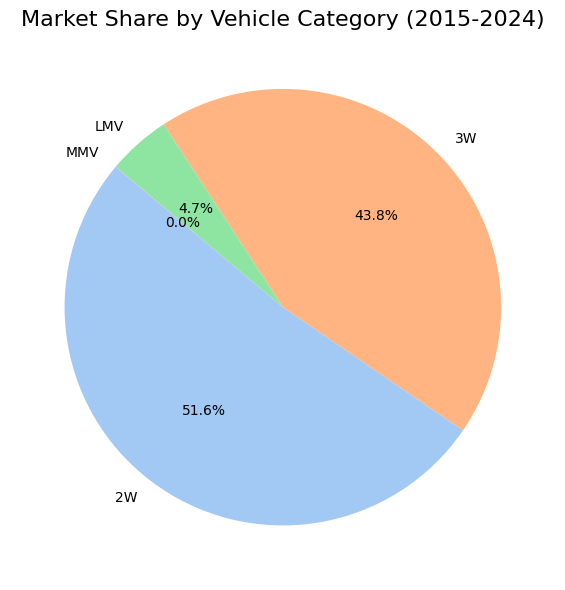

In [ ]:
total_sales_by_category = category_sales.loc[:, '2015':'2024'].sum(axis=1)

market_share = (total_sales_by_category / total_sales_by_category.sum()) * 100

print("\nMarket Share by Vehicle Category:")
print(market_share.sort_values(ascending=False))

plt.figure(figsize=(8, 6))
market_share.sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Market Share by Vehicle Category (2015-2024)", fontsize=16)
plt.ylabel("")
plt.tight_layout()
plt.show()


**sales growth per year**


Average Yearly Growth by Vehicle Category (%):
Cat
MMV    289.522247
2W     204.478657
3W     121.311635
LMV     84.192863
dtype: float64


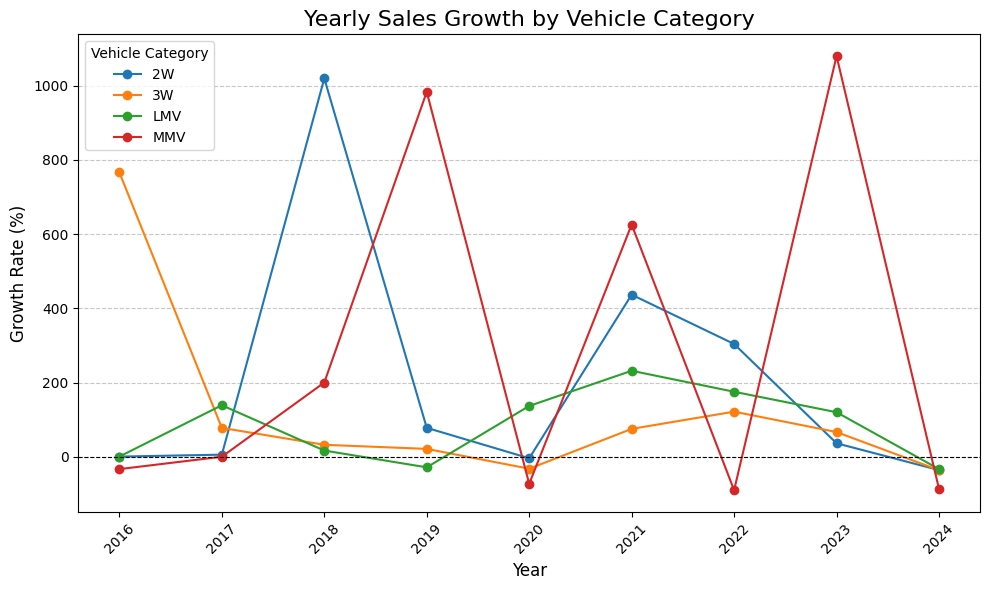

In [ ]:
yearly_growth = category_sales.loc[:, '2015':'2024'].pct_change(axis=1) * 100

average_growth = yearly_growth.mean(axis=1)
print("\nAverage Yearly Growth by Vehicle Category (%):")
print(average_growth.sort_values(ascending=False))

plt.figure(figsize=(10, 6))
for category in category_sales.index:
    plt.plot(yearly_growth.columns, yearly_growth.loc[category], marker='o', label=category)

plt.title("Yearly Sales Growth by Vehicle Category", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Growth Rate (%)", fontsize=12)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.xticks(rotation=45)
plt.legend(title="Vehicle Category")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Data visualization**

**Total EV Sales by Vehicle Category (2015-2024)**

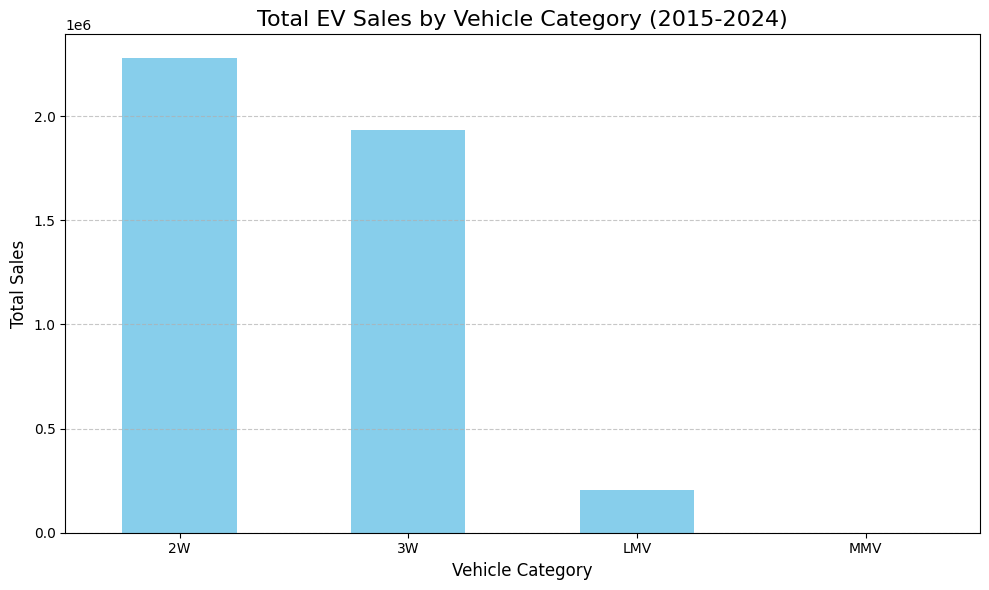

In [ ]:
ev_data.columns = ev_data.columns.str.strip()

category_sales = ev_data.groupby('Cat').sum(numeric_only=True)
category_sales_total = category_sales.loc[:, '2015':'2024'].sum(axis=1)

plt.figure(figsize=(10, 6))
category_sales_total.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Total EV Sales by Vehicle Category (2015-2024)", fontsize=16)
plt.xlabel("Vehicle Category", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Yearly Sales Trend for Top EV Categories**



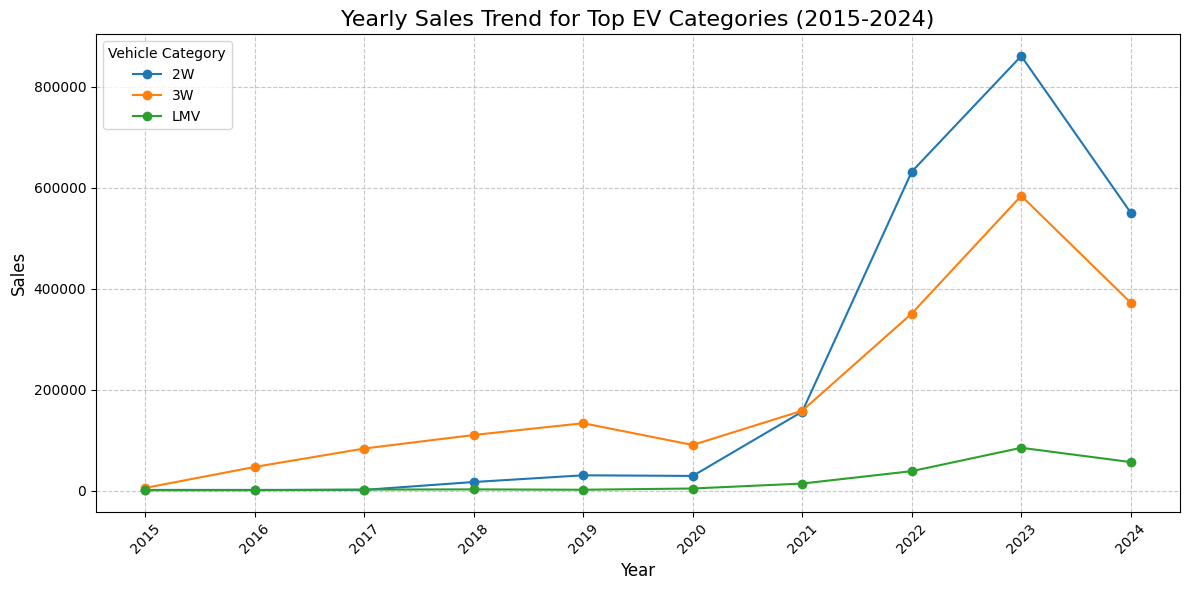

In [ ]:
top_categories = category_sales_total.sort_values(ascending=False).head(3).index

yearly_trend = category_sales.loc[top_categories, '2015':'2024'].T

plt.figure(figsize=(12, 6))
for category in top_categories:
    plt.plot(yearly_trend.index, yearly_trend[category], marker='o', label=category)

plt.title("Yearly Sales Trend for Top EV Categories (2015-2024)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Vehicle Category")
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Yearly Sales Trend (Line Chart):**

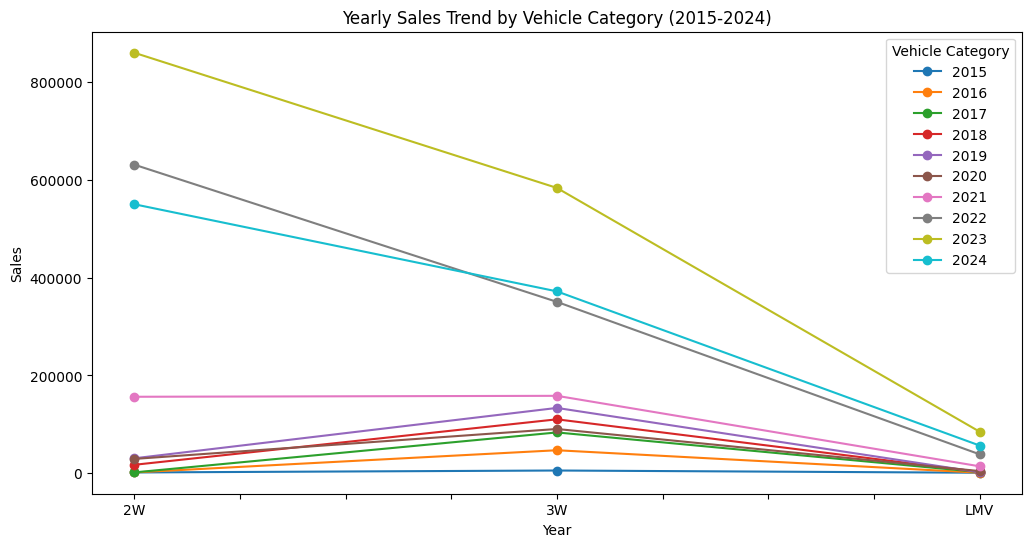

In [ ]:
yearly_trend.T.plot(figsize=(12, 6), marker='o')
plt.title("Yearly Sales Trend by Vehicle Category (2015-2024)")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend(title="Vehicle Category")
plt.show()


**Yearly Growth Rate (Heatmap):**

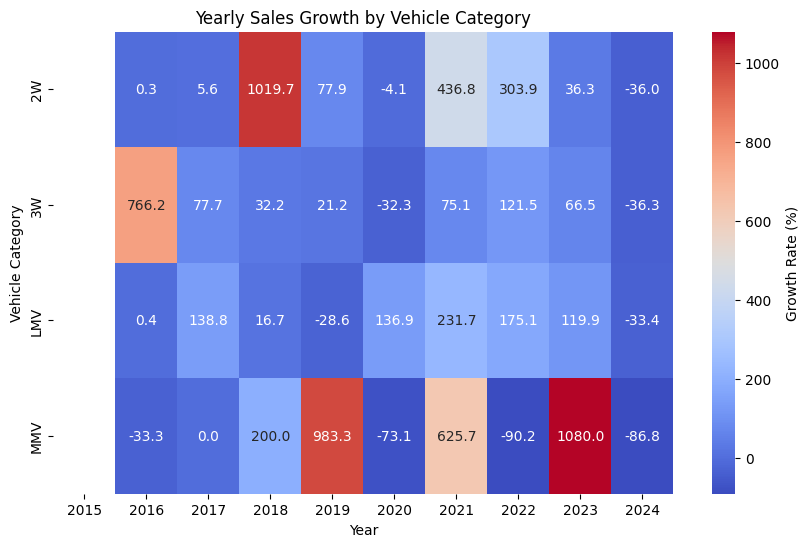

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(yearly_growth, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'Growth Rate (%)'})
plt.title("Yearly Sales Growth by Vehicle Category")
plt.xlabel("Year")
plt.ylabel("Vehicle Category")
plt.show()
